In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import io
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
corr = df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [4]:
X = df.drop(['Weight','Species'], axis=1)
y = df['Weight']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 5), (32, 5), (127,), (32,))

In [6]:
#linear regression

In [7]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)
predictions =linear.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
print('R^2 score: %.3f' % r2_score(y_test, predictions))


R^2 score: 0.863


In [9]:
print(linear.coef_, linear.intercept_)

[ 80.38246172 -23.91313616 -31.52808371  32.21045103  24.0330976 ] -446.1173994833813


In [10]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
linear_reg=sm.OLS(y_train, X).fit()
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     189.1
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.03e-55
Time:                        21:34:45   Log-Likelihood:                -779.00
No. Observations:                 127   AIC:                             1570.
Df Residuals:                     121   BIC:                             1587.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -446.1174     31.027    -14.378      0.0

In [11]:
linear_reg.bse

const      31.027019
Length1    40.822442
Length2    42.552569
Length3    17.439377
Height      8.908654
Width      21.365560
dtype: float64

In [12]:
print('R2 score:', linear_reg.rsquared)
print(linear_reg.pvalues)

R2 score: 0.8865221536639928
const      5.982512e-28
Length1    5.123003e-02
Length2    5.751781e-01
Length3    7.311111e-02
Height     4.379380e-04
Width      2.628781e-01
dtype: float64


In [13]:
print(round(linear_reg.pvalues))

const      0.0
Length1    0.0
Length2    1.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64


In [14]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)

In [15]:
rmse

161.33107273485072

In [17]:
df.corrwith(df["Weight"])

Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
dtype: float64

In [21]:
(df.Length1.factorize()[0] == df.Weight.factorize()[0]).all()

False

In [22]:
(df.Length2.factorize()[0] == df.Weight.factorize()[0]).all()

False

In [23]:
(df.Length3.factorize()[0] == df.Weight.factorize()[0]).all()

False

In [25]:
corr_matrix = df.corr()
print(corr_matrix["Weight"].sort_values(ascending=False))

Weight     1.000000
Length3    0.923044
Length2    0.918618
Length1    0.915712
Width      0.886507
Height     0.724345
Name: Weight, dtype: float64


In [26]:
import matplotlib.pyplot as plt

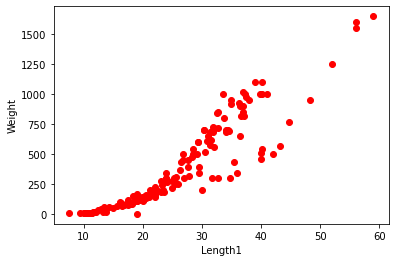

In [33]:
Length1 = df['Length1']
Length2 = df['Length2']
Length3 = df['Length3']
Weight = df['Weight']
plt.scatter(df['Length1'],df['Weight'], color='red')
plt.xlabel("Length1")
plt.ylabel("Weight")
plt.show()

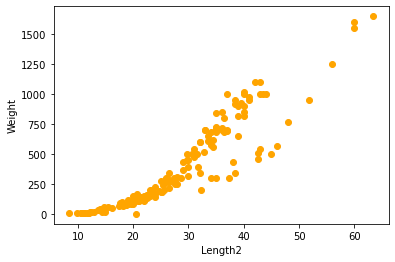

In [34]:
plt.scatter(df['Length2'],df['Weight'], color='orange')
plt.xlabel("Length2")
plt.ylabel("Weight")
plt.show()

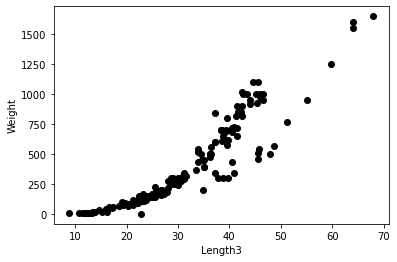

In [35]:
plt.scatter(df['Length3'],df['Weight'], color='black')
plt.xlabel("Length3")
plt.ylabel("Weight")
plt.show()